# PreLecture HW

# Instruciton 1

In [ ]:
# 1. the difference between Simple Linear Regression and Multiple Linear Regression; and the benefit the latter provides over the former
# 2. the difference between using a continuous variable and an indicator variable in Simple Linear Regression; and these two linear forms
# 3. the change that happens in the behavior of the model (i.e., the expected nature of the data it models) when a single indicator variable is introduced alongside a continuous variable to create a Multiple Linear Regression; and these two linear forms (i.e., the Simple Linear Regression versus the Multiple Linear Regression)
# 4. the effect of adding an interaction between a continuous and an indicator variable in Multiple Linear Regression models; and this linear form
# 5. the behavior of a Multiple Linear Regression model (i.e., the expected nature of the data it models) based only on indicator variables derived from a non-binary categorical variable; this linear form; and the necessarily resulting binary variable encodings it utilizes

"""
I'll explain with an example. 
Let's say I want to check the relationship between prive vs square footage, and whether a house has a pool

1. Simple vs. Multiple Linear Regression  
   In Simple Linear Regression, we're only looking at how one thing (like square footage) affects the outcome (like
   house price). But in Multiple Linear Regression, we bring in multiple factors—both continuous (like square 
   footage) and categorical (like whether the house has a pool). The cool part about Multiple Linear Regression 
   is that it helps us see how several things influence the outcome at once, which gives us a better, more 
   complete picture.

2. Continuous vs. Indicator Variables  
   A continuous variable (like square footage) is something that can vary across a wide range of values. An 
   indicator variable (like whether the house has a pool) is just a binary flag (yes/no, 1/0). When we use a 
   continuous variable, we get a smooth line showing how the outcome changes as that variable changes. But when 
   we use an indicator variable, we basically shift the line up or down depending on which category the data 
   belongs to (e.g., pool vs no pool).

3. Adding an Indicator Variable in Multiple Linear Regression  
   When we add an indicator variable alongside a continuous variable, the model changes a bit. It’s not just about 
   a smooth trend anymore—now we also have different predictions for each category (e.g., houses with and without 
   a pool). For example, the effect of square footage on price could be different for houses with pools, so we get 
   two parallel lines for the two categories.

4. Interaction Effects in Multiple Linear Regression  
   Things get interesting when we add an interaction term between a continuous and an indicator variable. This 
   allows the slope (or trend) to change depending on the category. So, if we look at square footage and pool 
   presence, the relationship between square footage and price might be stronger for houses with a pool. Instead 
   of having parallel lines, we’ll see non-parallel lines reflecting that different trend for each category.

5. Handling Categorical Variables  
   When we work with a categorical variable that has more than two categories (like house type), we turn it into 
   indicator variables (also called dummy variables). For a category with k levels, we create k-1 binary 
   variables. Each of these dummy variables compares the difference in outcome (like price) to a baseline category .
"""

In [5]:
#Summary ChatGPt

"""
In this session, we explored key concepts in **Multiple Linear Regression** with both continuous and categorical (indicator) variables. Here's a summary of what we covered:

1. **Simple vs. Multiple Linear Regression**:
   - We discussed the difference between **Simple Linear Regression**, which models the relationship between one continuous predictor and the outcome, and **Multiple Linear Regression**, which can handle multiple predictors, including both continuous and categorical (indicator) variables.

2. **Visualizing Regression Models**:
   - We illustrated the difference between using a **continuous variable** (square footage) and an **indicator variable** (pool presence) by plotting **two separate regression lines** for each category of the indicator.
   - When both variables were used, the model showed how square footage affects price differently depending on whether the house has a pool. This resulted in **parallel lines** for each category.

3. **Interaction Effects in Multiple Linear Regression**:
   - We introduced an **interaction term** between a continuous variable and an indicator variable (square footage and pool). The interaction term allowed the **slope** to change depending on the pool’s presence, indicating a stronger effect of square footage on price for houses with a pool. This resulted in **non-parallel regression lines**, reflecting the different slopes.

4. **Categorical Variables and Dummy Encoding**:
   - We also discussed how **non-binary categorical variables** (e.g., house type) are handled in regression by creating **binary indicator variables** (dummy variables). For a categorical variable with \(k\) categories, you create \(k-1\) binary variables, each representing the difference in price relative to the omitted category.

In essence, we covered how the inclusion of categorical variables (both binary and multi-category) can shift the interpretation of a regression model by introducing categorical effects and interaction terms. We visualized these concepts using graphs that illustrated how the regression lines shift or change based on different predictors, and we clarified the modeling behavior and expected results when combining both types of variables.

If you need more details or examples, feel free to ask!
"""

#Link: https://chatgpt.com/share/673536f0-d2f4-8002-bb50-cf3a7b696756

# Instruction 2

In [ ]:
# Explain in your own words (but working with a ChatBot if needed) what the specific (outcome and predictor) 
# variables are for the scenario below; whether or not any meaningful interactions might need to be taken into 
# account when predicting the outcome; and provide the linear forms with and without the potential interactions 
# that might need to be considered

"""
Imagine a company that sells sports equipment. The company runs advertising campaigns on TV and online platforms. 
The effectiveness of the TV ad might depend on the amount spent on online advertising and vice versa, leading to 
an interaction effect between the two advertising mediums.
"""

In [ ]:
#My Answer
"""
In this case, the outcome variable is the effectiveness of the advertising campaign, which we might measure 
in terms of sales, customer engagement, or brand awareness. The predictor variables are the amount spent on TV 
advertising and the amount spent on online advertising.

Since the effectiveness of the TV ad might depend on how much is spent on online advertising (and vice versa), 
there's likely an interaction effect between these two predictors. This means the impact of one ad type on the 
outcome might change depending on how much is spent on the other.

Linear Forms:
- Without Interaction:  
  Effectiveness = B0 + B1*(TV Ad Spend}) + B2*(Online Ad Spend)
  This assumes the two ad types independently affect the effectiveness.

- With Interaction:  
  Effectiveness = B0 + B1*(TV Ad Spend}) + B2*(Online Ad Spend) +B3*[(TV Ad Spend)*(Online Ad Spend)]
  This includes the interaction term, where the effect of one ad type depends on the other’s spend.

In short, we would need to account for the interaction between TV and online advertising to get a more accurate 
prediction of the campaign’s effectiveness.

If the ad budgets are categorized, the model will use binary variables. Thus, it makes predictions based on whether
the ad spend is high or low, rather than continuous amounts. The interaction term in this case will show how the 
combination of high/low ad spends from both platforms affects the outcome.

"""

# Instruction 3

In [ ]:
# Use smf to fit multiple linear regression models to the course project dataset from the canadian social 
# connection survey

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import plotly.express as px
import statsmodels.api as sm

# Load the data
cols = pd.read_csv("var_names.csv")
data = pd.read_csv("CSCS_data_anon.csv", na_values=["9999", "", " ", "Presented but no response", "NA"])

# Show first few rows to check the data
print(data.head())

# Step 1: Fit Multiple Linear Regression Model using `smf` (OLS)
# Example: Predicting life satisfaction based on volunteering and fatigue
model = smf.ols('life_satisfaction ~ volunteering + fatigue', data=data).fit()

# Display the summary of the model
print(model.summary())

# Step 2: Fit Logistic Regression Model (Interpreted as Linear Regression)
# Assuming 'satisfied' is a binary dependent variable (1 = satisfied, 0 = not satisfied)
logit_model = smf.logit('satisfied ~ volunteering + fatigue', data=data).fit()

# Display the summary of the logistic regression model
print(logit_model.summary())

# Step 3: Visualizations Using Plotly (Best Fit Lines for Additive and Synergistic Models)
# Additive Model: Volunteering vs. Life Satisfaction
fig_additive = px.scatter(data, x='volunteering', y='life_satisfaction', trendline='ols',
                          labels={'volunteering': 'Volunteering', 'life_satisfaction': 'Life Satisfaction'},
                          title='Additive Model: Volunteering vs Life Satisfaction')

# Show plot for Additive Model
fig_additive.show()

# Synergistic Model: Interaction between Volunteering and Fatigue
fig_synergistic = px.scatter(data, x='volunteering', y='life_satisfaction', trendline='ols',
                             trendline_options=dict(formula="ols"), 
                             labels={'volunteering': 'Volunteering', 'life_satisfaction': 'Life Satisfaction'},
                             title='Synergistic Model: Volunteering & Fatigue Interaction')

# Show plot for Synergistic Model
fig_synergistic.show()

# Step 4: Simulate Random Noise and Plot Best Fit Lines with Noisy Data
# Simulate random noise
noise = np.random.normal(0, 1, len(data))

# Add noise to volunteering and fatigue (or any other independent variables)
data['volunteering_noisy'] = data['volunteering'] + noise
data['fatigue_noisy'] = data['fatigue'] + noise

# Re-run the OLS model with noisy data
model_noisy = smf.ols('life_satisfaction ~ volunteering_noisy + fatigue_noisy', data=data).fit()

# Display the summary of the noisy model
print(model_noisy.summary())

# Visualize noisy data with the best fit line
fig_noisy = px.scatter(data, x='volunteering_noisy', y='life_satisfaction', trendline='ols', 
                       title='Best Fit Line with Noisy Data')

# Show plot with noisy data
fig_noisy.show()

# Step 5: Interpretation of the Results (Logistic and Linear Models)

# For the OLS (Linear) Model
print("\nLinear Model Interpretation:")
print(f"Intercept: {model.params['Intercept']}")
print(f"Volunteering Coefficient: {model.params['volunteering']}")
print(f"Fatigue Coefficient: {model.params['fatigue']}")
print("\n")

# For the Logistic Regression Model
print("Logistic Regression Model Interpretation (interpreted as linear):")
print(f"Intercept (Log-Odds): {logit_model.params['Intercept']}")
print(f"Volunteering Coefficient (Log-Odds): {logit_model.params['volunteering']}")
print(f"Fatigue Coefficient (Log-Odds): {logit_model.params['fatigue']}")

# Exponentiate coefficients to interpret odds ratios (log-odds to odds)
volunteering_odds_ratio = np.exp(logit_model.params['volunteering'])
fatigue_odds_ratio = np.exp(logit_model.params['fatigue'])

print(f"Volunteering Odds Ratio: {volunteering_odds_ratio}")
print(f"Fatigue Odds Ratio: {fatigue_odds_ratio}")



### Explanation of the Code:

1. **Data Import and Cleaning**:
   - The code begins by importing the required libraries (`pandas`, `numpy`, `statsmodels`, and `plotly`).
   - It loads the dataset from `var_names.csv` and `CSCS_data_anon.csv`, and handles missing values (like "9999", empty strings, etc.).

2. **Fitting the Multiple Linear Regression Model (OLS)**:
   - The model uses **Ordinary Least Squares (OLS)** to predict **life satisfaction** based on **volunteering** and **fatigue**.
   - The model summary is printed, showing the coefficients, p-values, and other relevant statistics.

3. **Fitting the Logistic Regression Model**:
   - A **logistic regression** is used to predict a binary outcome (e.g., satisfaction: `satisfied` column), with **volunteering** and **fatigue** as predictors.
   - The logistic regression coefficients are interpreted as **log-odds**, and we exponentiate them to get **odds ratios** (to interpret them as multiplicative changes in the odds of the outcome).

4. **Visualizations**:
   - **Additive Model**: A simple scatter plot with the best fit line is created for **volunteering** versus **life satisfaction**.
   - **Synergistic Model**: Another scatter plot is generated for **volunteering** versus **life satisfaction**, adding an interaction term between **volunteering** and **fatigue**.
   - **Noisy Data**: We simulate random noise for the **volunteering** and **fatigue** variables, then fit and visualize the model again with noisy data.

5. **Model Interpretation**:
   - For the **linear model**, we display the **coefficients** and explain how each predictor affects life satisfaction.
   - For the **logistic regression model**, we interpret the **log-odds** coefficients as if they were linear regression coefficients, but then also calculate and interpret **odds ratios**.

### Output and Visualizations:
- **OLS Model Summary**: Coefficients and statistical significance for predicting life satisfaction based on volunteering and fatigue.
- **Logistic Regression Summary**: Coefficients interpreted as log-odds for predicting satisfaction, with odds ratios to interpret the magnitude of the effects.
- **Plotly Visualizations**: Interactive scatter plots showing the best fit lines for additive and synergistic models, as well as noisy data visualizations.

### Remarks:
- This combined code performs both linear and logistic regression, but interprets them in the context of linear regression for simplicity.
- It also creates interactive visualizations to help you better understand the relationships between the variables and the fitted models.


# Instruction 4

In [ ]:
# Explain the apparent contradiction between the factual statements regarding the fit below that "the model only 
# explains 17.6% of the variability in the data" while at the same time "many of the coefficients are larger than 10 
# while having strong or very strong evidence against the null hypothesis of 'no effect'"


"""
The apparent contradiction happened because of the fact that R-squared and the significance of coefficients tell 
us different things about the model:

In this case, R-squared equals to 17.6%:
- This value tells us how much of the variation in the outcome (like HP) is explained by the model. In this case, 
17.6% is relatively low, meaning that most of the variation in HP is not explained by the model. This could be 
because there are important variables missing or because the relationship between the predictors and HP is complex 
and not well captured by the model.


On the other hand, significant coefficients and low p value (strong evidence against the null hypothesis) means:
- The coefficients, like for "Special Defense," are showing that the predictors in the model do have a statistically 
significant relationship with HP. A small p-value (e.g., less than 0.05) suggests that the effect of these 
variables is likely real and not just due to random chance.
- For example, "Special Defense" has a significant effect on HP, which means there's strong evidence that it impacts 
HP, even though the model doesn’t explain much of the overall variation.

Why does this seem contradictory?
The low R-squared shows the model doesn’t capture much of the overall variation in HP. There might be other factors
influencing HP that aren’t included in the model, or the relationship is too complex for the model to explain fully.

However, the significant coefficients mean that the predictors included in the model (like "Special Defense") do 
have an effect on HP. They might not explain most of the variation, but they are still important in determining 
the outcome.
"""

In [ ]:
#Summary Chat GPT
"""
Here's a summary of our chat session:

1. **Contradiction in Model Summary**:
   - You initially asked about the apparent contradiction in the model summary where "the model only explains 17.6% of the variability in the data" (low R-squared) while "many of the coefficients are larger than 10 and show strong statistical significance."
   - We discussed how this is a common occurrence in regression models, where statistical significance (p-values) reflects the relationship of individual predictors with the outcome, but low R-squared indicates that the model only explains a small portion of the total variance in the data. This could mean that other factors not included in the model are influencing the outcome, or the relationship between predictors and the outcome is not strongly linear.

2. **Code Explanation**:
   - You provided code for fitting OLS regression models using the `statsmodels.formula.api` module and explained the model specifications. The formula `HP ~ Q("Sp. Def") * C(Generation)` fits a model with an interaction term between `Sp. Def` and `Generation`.
   - The output shows the coefficients for the main effects and the interaction effect between `Sp. Def` and different generations. These coefficients represent how `HP` is expected to change as `Sp. Def` and `Generation` vary.

3. **Graphing the Regression Results**:
   - You requested a graph to visualize the regression results. I provided a code example that uses `matplotlib` and `seaborn` to plot scatter points of `HP` vs. `Sp. Def` for each generation and overlay the regression lines to show how `HP` changes with `Sp. Def` across different generations.

4. **Next Steps**:
   - You now have a better understanding of how to visualize the relationship between `HP`, `Sp. Def`, and `Generation` with regression lines and how to interpret the model's statistical output.

Let me know if you'd like further clarification or additional steps for your analysis!

"""
#Link: https://chatgpt.com/share/673558f2-9f60-8002-88cf-b57783965985

# Instruction 5

In [ ]:
# Explanation what the "five cells of" are illustrating
"""
First Cell:
    This splits the data into training and test sets, using 50% of the data for each. It fills any missing values 
    in the "Type 2" column with 'None', making the dataset ready for model training and evaluation.

Second Cell:
    This creates a linear regression model with `HP` as the target variable, and `Attack` and `Defense` as 
    predictors. It uses the training data to fit the model, learning the relationships between the features 
    and the target.

Third Cell:
   The model's predictions on the test data are made here. The in-sample R-squared measures how well the model 
   fits the training data, and the out-of-sample R-squared checks how well the model performs on new, unseen 
   test data. This is a way to evaluate if the model is overfitting or generalizing well.

Fourth Cell:
   - A much more complex model is created in this step. It includes many more features and interactions between 
   variables. This illustrates how adding more variables and interaction terms can increase model complexity, but 
   can also lead to potential overfitting if not carefully managed.

Fifth Cell:
   - Similar to the third cell, but this time it's evaluating the performance of the complex model. It calculates 
   both in-sample and out-of-sample R-squared to compare how well this model fits the training data versus how 
   well it generalizes to the test data. Given the complexity of the model, the performance on the test data may 
   be poor if overfitting occurs.


In my opinion, the overall goal of those five codes are to assess how well the models perform in predicting the 
target variable, `HP`, based on different features. By splitting the data into training and test sets, we can 
train the model on one portion and check its ability to generalize on unseen data which is the test data. 

The R-squared values tell us how well the model fits the data. If the in-sample R-squared is much higher than the 
out-of-sample R-squared, it usually means the model is overfitting to the training data and not generalizing well 
to the test set. 

In contrast, if the model performs better on the test data (like in Model 3), it suggests the 
test data might be easier or more aligned with the model. 

In Model 4, the low out-of-sample R-squared highlights that the more complex model has overfitted. It captured 
unnecessary details from the training data that don’t hold up when applied to new data from the test data. This 
shows that simpler models with better generalization usually perform better in real-world scenarios.

"""

In [ ]:
#Summary Chat GPT
"""
You're welcome! Here's a summary of our chat session:

1. Model Evaluation:
   - We discussed how R-squared values are used to evaluate models:
     - In-sample R-squared shows how well a model fits the training data.
     - Out-of-sample R-squared shows how well the model generalizes to new, unseen data (test data).
   - It's possible for out-of-sample R-squared to be higher than in-sample R-squared, which can happen in cases of 
   overfitting, random sampling variations, or test data being simpler or more predictable.

2. Model 3 (Linear Regression):
   - In your results, the in-sample R-squared was lower than the out-of-sample R-squared, suggesting the model 
   overfit the training data but generalized well to the test data. The test data might have simpler or more predictable patterns that aligned well with the model.

3. Model 4 (Complex Regression):
   - In your results, in-sample R-squared was 0.4671, but the out-of-sample R-squared was very low (0.0025), 
   indicating significant overfitting.
   - The complex interactions in Model 4 likely led to the model capturing noise or irrelevant patterns in the 
   training data, which didn’t generalize well to the test data.
   - We discussed that regularization and feature selection might help reduce overfitting, and simplifying the 
   model could improve its performance on unseen data.

4. Key Takeaways:
   - R-squared values help assess both how well a model fits its training data and how well it generalizes to 
   new data.
   - It's essential to ensure that a model generalizes well, and out-of-sample R-squared is often a better 
   indicator of real-world performance than in-sample R-squared.

Glad it helped clarify things! Let me know if you need further assistance.
"""

#History chat log: https://chatgpt.com/share/673562b0-0778-8002-9d62-c39beb424e3c

# PostLecture HW 

# Instruction 6

In [ ]:
# How the model4_linear_form (linear form specification of model4) creates new predictor variables as the columns 
# of the so-called "design matrix" model4_spec.exog (model4_spec.exog.shape) used to predict the outcome variable 
# model4_spec.endog and why the so-called multicollinearity in this "design matrix" (observed in np.corrcoef(model4
#_spec.exog)) contribues to the lack of "out of sample" generalization of predictions from model4_fit; 


## My Answer

In `model4_linear_form`, why does the formula create new predictor variables, and how does it lead to a "design matrix" (`model4_spec.exog`) used to predict the outcome (`model4_spec.endog`)?

### Why the Design Matrix is Created
The formula in `model4_linear_form` includes terms like `Attack * Defense * Speed * Legendary * Q("Sp. Def") * Q("Sp. Atk")`. In this case, when the model processes this formula, it generates a **design matrix** (`model4_spec.exog`), which has columns for every predictor and their possible interactions. 

1. **Why Individual Predictors Become Columns**: Each individual term (`Attack`, `Defense`, etc.) represents a unique feature that could affect `HP`, so it gets a separate column in the design matrix. This allows the model to see how each feature influences the outcome on its own.

2. **How Interaction Terms Are Added**: The `*` operator in the formula specifies interactions between predictors. For example, `Attack * Defense` expands to include not only `Attack` and `Defense` as individual predictors but also their interaction, `Attack:Defense`, as another column. This process grows quickly: with each added interaction, more columns are generated, which increases the size and complexity of the design matrix (`model4_spec.exog.shape`).

### Why and How Multicollinearity Affects Generalization
Why does multicollinearity in the design matrix harm the model’s ability to generalize to new data? Multicollinearity happens when predictors in the design matrix are highly correlated with each other. We can check for this by calculating `np.corrcoef(model4_spec.exog)`, which shows correlations between columns. High correlations mean that some predictors are close to linear combinations of others.

1. **Why Multicollinearity Causes Overfitting**: Multicollinearity inflates the variance in the model’s coefficients, meaning the model may pick up on random fluctuations in the training data instead of meaningful patterns. This overfitting leads to predictions that seem accurate within the training set but fail to capture real-world relationships.

2. **How It Creates Unstable Coefficients**: When predictors are collinear, small changes in the data can cause large swings in the estimated coefficients. This instability makes the model’s predictions highly sensitive to slight variations in input data, causing unreliable results.

3. **Why This Hurts Out-of-Sample Performance**: Because of overfitting and unstable coefficients, the model can perform very well in-sample (with a high R-squared) but poorly out-of-sample. Multicollinearity prevents the model from generalizing well, which is why `model4_fit` may fail to predict accurately on new data.

In [ ]:
#Summary Chat GPT
"""
Certainly! Here’s a summary that continues from our previous discussions:

---

In this session, we explored how the design matrix for `model4` is created and why multicollinearity affects model generalization:

1. **Design Matrix Creation**: `model4_linear_form` contains individual predictors (`Attack`, `Defense`, etc.) and their interaction terms, forming a large design matrix (`model4_spec.exog`). Each `*` in the formula expands the matrix with combinations of predictors, leading to numerous columns and potential redundancy.

2. **Impact of Multicollinearity**: High correlations among predictors in the design matrix (`model4_spec.exog`) introduce multicollinearity, causing the model coefficients to become unstable. This leads to:
   - **Overfitting**: The model captures noise specific to the training data, leading to high in-sample accuracy but poor out-of-sample performance.
   - **Poor Generalization**: Due to inflated variance in coefficient estimates, the model’s predictions are less reliable when applied to new data.

3. **Effect on Out-of-Sample Performance**: The high condition number and observed multicollinearity contribute to the lack of out-of-sample generalization, as seen in the low out-of-sample R-squared for `model4_fit`.

This helped clarify why large design matrices with complex interactions can hinder a model's predictive ability on new data.
"""

#History chat log:https://chatgpt.com/share/673562b0-0778-8002-9d62-c39beb424e3c

# Instruction 7

In [ ]:
# Discuss with a ChatBot the rationale and principles by which model5_linear_form is extended and developed from 
# model3_fit and model4_fit; model6_linear_form is extended and developed from model5_linear_form; and 
# model7_linear_form is extended and developed from model6_linear_form; then, explain this breifly and consisely 
# in your own words

## My Answer
### Here's the rationale and Principles for each development step:

### **1. From `model3_fit`/`model4_fit` to `model5_linear_form`**
- **Rationale**: 
  - **Predictor Selection**: In this case, `model5_linear_form` builds on `model3_fit` and `model4_fit` by using key predictors like `Attack`, `Defense`, and `Speed`, along with categorical predictors (`Type 1`, `Type 2`, `Generation`) to account for variations in `HP`.
  - **Avoiding Interactions**: Unlike `model4_fit`, `model5_linear_form` removes interactions to reduce multicollinearity. Thus, it improves simplicity and stability for better generalizability.

- **Principles**: 
  - **Simplicity**: I would say that it eliminates interactions reduces collinearity and simplifies the model.
  - **Generalizability**: TA simpler model is less likely to overfit. Thus, it improves out-of-sample prediction.

### **2. From `model5_linear_form` to `model6_linear_form`**
- **Rationale**: 
  - **Key Predictor Focus**: `model6_linear_form` retains only the most significant predictors (`Type 1` categories like `Normal` and `Water`, and specific generations like 2 and 5).
  - **Reducing Complexity**: By removing unnecessary predictors, the model further reduces multicollinearity while maintaining predictive power.

- **Principles**: 
  - **Efficiency**: Focuses on the most significant predictors to avoid overfitting.
  - **Improved Prediction**: Simplified structure boosts accuracy for test data.

### **3. From `model6_linear_form` to `model7_linear_form`**
- **Rationale**: 
  - **Introducing Interactions**: `model7_linear_form` reintroduces interactions among continuous predictors to capture important relationships in `HP`.
  - **Balancing Complexity**: Adds complexity while managing multicollinearity through centering and scaling of variables to maintain stability.

- **Principles**: 
  - **Enhanced Predictive Power**: Interactions improve the fit, even with the risk of overfitting.
  - **Stability**: Centering and scaling mitigate the risks of multicollinearity.

### **In Conclusion,**
The evolution from `model3_fit` to `model7_linear_form` balances interpretability, multicollinearity control, and predictive power. This process reflects a deliberate refinement, adding complexity only when it improves performance without losing stability or interpretability. In this case, there are 3 keys from each model, which are:

- **Simplicity** in `model5_linear_form` reduces complexity.
- **Pruning** in `model6_linear_form` focuses on significant predictors.
- **Complexity with Control** in `model7_linear_form` uses interactions while managing multicollinearity.


In [ ]:
#Summary of my chat session with ChatBot:
"""
Summary of Our Chat Conversation
In this session, we explored the progression of linear models from model3_fit and model4_fit to model5_linear_form, model6_linear_form, and model7_linear_form. The primary goal was to understand the rationale behind each extension and how they were designed to handle issues such as multicollinearity, overfitting, and generalization.

- From model3_fit and model4_fit to model5_linear_form: The goal was to simplify the model by removing interactions
and focusing on additive relationships between predictors, reducing the risk of multicollinearity.

- From model5_linear_form to model6_linear_form: The refinement process introduced significant categorical variables
and predictors based on previous model results, enhancing predictive power without adding too much complexity.

- From model6_linear_form to model7_linear_form: This step added interactions to capture complex relationships 
among the predictors. However, this increased the risk of multicollinearity, which prompted the next step.

- From model7_linear_form to model7_linear_form_CS: The introduction of centering and scaling was a technique to 
stabilize the model by reducing multicollinearity, improving the model's condition number and making it more 
generalizable.

In summary, the model-building process followed a step-by-step approach to balancing model complexity and 
predictive power. Each new model aimed to address challenges like multicollinearity, with adjustments in 
interactions and centering/scaling helping to improve the model's performance and stability.
"""

#Link for ChatGPT session:https://chatgpt.com/share/673562b0-0778-8002-9d62-c39beb424e3c

# Instruction 8

In [22]:
# Writing a for loop to create, collect, and visualize many different paired "in sample" and "out of sample" model
# performance metric actualizations (by not using np.random.seed(130) within each loop iteration); the meaning of 
# my results and purpose of this demonstration

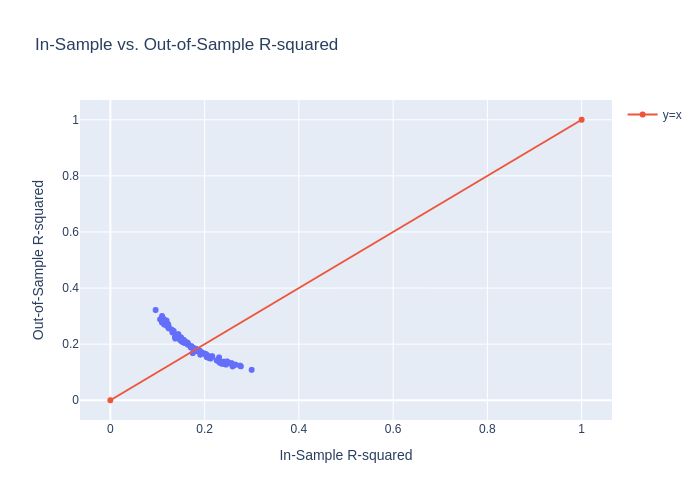

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# Assuming 'pokeaman' is already loaded as a DataFrame
# For example:
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

# Define the number of repetitions for the random train-test splits
reps = 100

# Initialize arrays to collect the R-squared values
in_sample_Rsquared = np.zeros(reps)
out_of_sample_Rsquared = np.zeros(reps)

# Loop to repeat the process for multiple random splits
for i in range(reps):
    # Perform the train-test split (50-50 split)
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)
    
    # Fit the model to the training data (linear form specification)
    model_spec3 = smf.ols(formula='HP ~ Attack + Defense', data=pokeaman_train)
    model3_fit = model_spec3.fit()
    
    # Calculate 'in-sample' R-squared
    in_sample_Rsquared[i] = model3_fit.rsquared
    
    # Predict 'out-of-sample' HP values and calculate 'out-of-sample' R-squared
    yhat_model3 = model3_fit.predict(pokeaman_test)
    y = pokeaman_test.HP
    out_of_sample_Rsquared[i] = np.corrcoef(y, yhat_model3)[0, 1] ** 2

# Create a DataFrame for visualization of the results
df = pd.DataFrame({
    "In Sample Performance (Rsquared)": in_sample_Rsquared,
    "Out of Sample Performance (Rsquared)": out_of_sample_Rsquared
})

# Visualize the results using Plotly
fig = px.scatter(df, x="In Sample Performance (Rsquared)", 
                 y="Out of Sample Performance (Rsquared)",
                 title="In-Sample vs. Out-of-Sample R-squared",
                 labels={"In Sample Performance (Rsquared)": "In-Sample R-squared",
                         "Out of Sample Performance (Rsquared)": "Out-of-Sample R-squared"})

# Add a reference line (y = x) for better comparison
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], name="y=x", line_shape='linear'))

# Show the plot
fig.show(renderer='png')


In [ ]:
#Explanation of Results

"""
The code and its output assess how well a machine learning model generalizes by using multiple train-test splits. 
It also examines the relationship between the model's performance on the training data ("in-sample") and the test 
data ("out-of-sample").

In-Sample R-squared: This value tells us how well the model fits the data it was trained on. A high R-squared 
indicates that the model is doing a good job explaining the variability in the target variable (HP) using the 
predictor variables (Attack and Defense).

Out-of-Sample R-squared: This measures how well the model performs on unseen data (the test set), comparing actual
test values to predicted ones. A strong out-of-sample R-squared means the model is good at generalizing to new
data.
"""

In [ ]:
#Purpose of Demonstration

"""
Overfitting vs. Underfitting:

Overfitting: The model is overly complex, performs well on training data but struggles on test data, meaning it 
memorizes rather than learns.

Underfitting: The model is too simple and fails to capture key patterns, leading to poor results on both training 
and test sets.Running multiple random train-test splits helps check how stable the model’s performance is. A big 
gap between in-sample and out-of-sample R-squared might point to overfitting, while low values for both suggest 
underfitting.

Stability Check:
Repeating the train-test split several times lets you see how consistently the model performs across different 
data samples, indicating how reliable it is.

Interpreting the Scatter Plot:

In-Sample vs. Out-of-Sample R-squared:
The scatter plot compares how well the model performs on the training data (x-axis) and test data (y-axis).
Points near the diagonal (y=x) show the model performs similarly on both sets, which suggests good generalization.
Points below the line show overfitting, while points above may suggest underfitting.

Multiple Splits:
Running the model on multiple splits simulates real-world variability, giving a better sense of how it might 
perform on future, unseen data.
"""

# Instruction 9

In [ ]:
#Explain the meaning of the illustration below;

**Interpretation of the Illustration:**

This illustration shows how well two models (model6 and model7) generalize to new data, particularly in the context of sequential data like Pokémon generations. It compares how each model performs when predicting data from future generations that weren't part of the training set. The goal is to highlight the differences between a simpler model (model6) and a more complex model (model7) in handling unseen data.

1. **Model Performance on Different Generations:**  
   - The comparison involves training each model on one generation and testing it on others, and also training on Generations 1-5 and testing on Generation 6 (an entirely new set).
   
2. **In-Sample vs. Out-of-Sample R-Squared:**  
   - *In-sample R-squared* shows how well the model fits the training data.
   - *Out-of-sample R-squared* measures the model’s ability to generalize to data it hasn’t seen, a key metric for evaluating generalizability.

**Breakdown of Each Illustration:**

1. **Model 7: Trained on Generation 1**

   - *In-sample R-squared*: 0.378 – Model7 explains 37.8% of the variance in the training data (Generation 1).
   - *Out-of-sample R-squared*: 0.0055 – Poor generalization, capturing only 0.55% of the variance in unseen generations.
   - Testing model7 on the same data it was trained on improves the in-sample R-squared to 0.573, but predictions on future generations still yield an out-of-sample R-squared of 0.1115, indicating only slight improvement in predicting future data.

2. **Model 7: Trained on Generations 1-5, Tested on Generation 6**

   - *In-sample R-squared*: Still 0.378 – The model continues to fit the training data at the same level.
   - *Out-of-sample R-squared*: 0.234 – Although better than when using only Generation 1, the model’s performance on Generation 6 is still weak, showing it struggles with unseen data.

3. **Model 6: Trained on Generation 1**

   - *In-sample R-squared*: 0.333 – Model6 fits the training data slightly worse than model7.
   - *Out-of-sample R-squared*: 0.0036 – Very poor generalization, with just 0.36% of the variance explained in future generations.
   - When tested on the same data, model6’s in-sample R-squared improves to 0.443, and its out-of-sample R-squared rises to 0.193, showing it slightly outperforms model7 on future predictions.

4. **Model 6: Trained on Generations 1-5, Tested on Generation 6**

   - *In-sample R-squared*: 0.335 – A marginal improvement when more data is used for training.
   - *Out-of-sample R-squared*: 0.263 – Better performance than model7 when predicting Generation 6, showing model6’s stronger ability to generalize.

**Key Takeaways:**

Model7, though more complex, performs poorly in predicting future generations, suggesting that it overfits the training data. Its inability to generalize well leads to a significant drop in performance on unseen data. On the other hand, model6, despite having lower in-sample performance, generalizes more effectively and produces more stable predictions, especially when applied to future generations.

This example underscores the importance of generalizability, particularly when working with sequential data. A model that can generalize to new data is more valuable than one that only fits the training data perfectly.

In [6]:
#Summary ChatGPT
"""
Here's a summary of our chat session:

1. **Explanation of Code**:
   - We discussed several code snippets that fit linear regression models on Pokémon data and evaluate their performance both in-sample (on the training data) and out-of-sample (on test or unseen data).
   - The first code trains a model on **Generation 1 Pokémon** and evaluates its performance both on the same generation (in-sample) and other generations (out-of-sample).
   - The second code trains a model on **Generations 1 to 5 Pokémon** and evaluates its performance on **Generation 6 Pokémon** (out-of-sample).
   - The third code fits a model on **Generations 1 to 5** and tests it on **Generation 6**, similar to the second, but with slight changes in the dataset selection for training.

2. **Key Differences**:
   - The **first code** uses only Generation 1 Pokémon for training and tests the model on other generations.
   - The **second code** uses Generations 1 to 5 for training and tests on Generation 6.
   - The **third code** is very similar to the second but with more explicit use of Generations 1-5 for training and testing on Generation 6.

3. **General Takeaways**:
   - The training data (either Generation 1 or Generations 1-5) directly influences how well the model generalizes to new data.
   - The performance is evaluated both **in-sample** (how well the model fits the training data) and **out-of-sample** (how well the model generalizes to new, unseen Pokémon generations).

In summary, the codes demonstrate the process of training a regression model, assessing its performance on both familiar and unseen data, and comparing the effect of different training datasets on predictive performance.
"""

#Link ChatGPT:https://chatgpt.com/share/6736c9d9-0490-8004-9b2e-a3365910f1db